# Lab 6

## Problem 1

**b) Create a 1D Numpy array labels and read in all labels from `labels.txt`**

In [ ]:
import numpy as np

label_list = []

with open('data/labels.txt', 'r') as file:
    for line in file:
        label = int(line.strip())
        label_list.append(label)

labels = np.array(label_list) # This is more efficient than initiating an empty numpy array and then appending to it:
                              # It avoids the resizing and copying that occurs with np.append

**c) Create a 3D Numpy array test. The first dimension shall represent the image index (0 to 9999) while the second and third dimension represent the image pixels.**

In [ ]:
image_size = 28
num_images = 10000

test = np.empty((num_images, image_size, image_size))
# print("Shape of the array:", test.shape)

**d) Generate a list of all images `imgNames`` using list comprehension.**

In [ ]:
img_names = ["data/test_"+str(i).zfill(len(str(num_images)))+".gif" for i in range(num_images)]

**e) Iterate through all image files. In every iteration, load the associated image file, convert it to a Numpy
array, divide it by 255 to normalize it to 1 and store it in test.**

In [ ]:
from PIL import Image
# iterate through all image files
    # load the associated image file, convert it to a Numpy array
    # divide it by 225 to normalize it to 1
    # store it in test

i = 0
for i, img_name in enumerate(img_names):
    image = Image.open(img_name)
    image_np = np.array(image) / 255
    test[i] = image_np
    # print("shape ", image_np.shape)

In [ ]:
# print(test[150])

## Problem 2

**a) Draw a digit**

![digit_four](four.gif)

**b) Load image of digit onto notebook and rescale**

In [ ]:
filename = 'four.gif'
img = Image.open(filename).convert('L') # Load image
imgRe = img.resize(size=(image_size ,image_size)) # resize it to 28 x 28
imageRe_np = np.array(imgRe)  / 255 
# print(imageRe_np)
# print(imageRe_np/255)

**c) Generate a single plot of five MNIST images of your digit**

In [216]:
# I have the images in my `test` np.array
# I have the labels for each image in my `labels` np.array

# Find 5 instances of my digit in `labels`
# Store their index 
# Find the corresponding images in my array `test`

desired_digit = 4
indices = np.where(labels == desired_digit)[0][:5]
digit_imgs = test[indices]
digit_imgs = np.concatenate([digit_imgs, [imageRe_np]], axis=0)


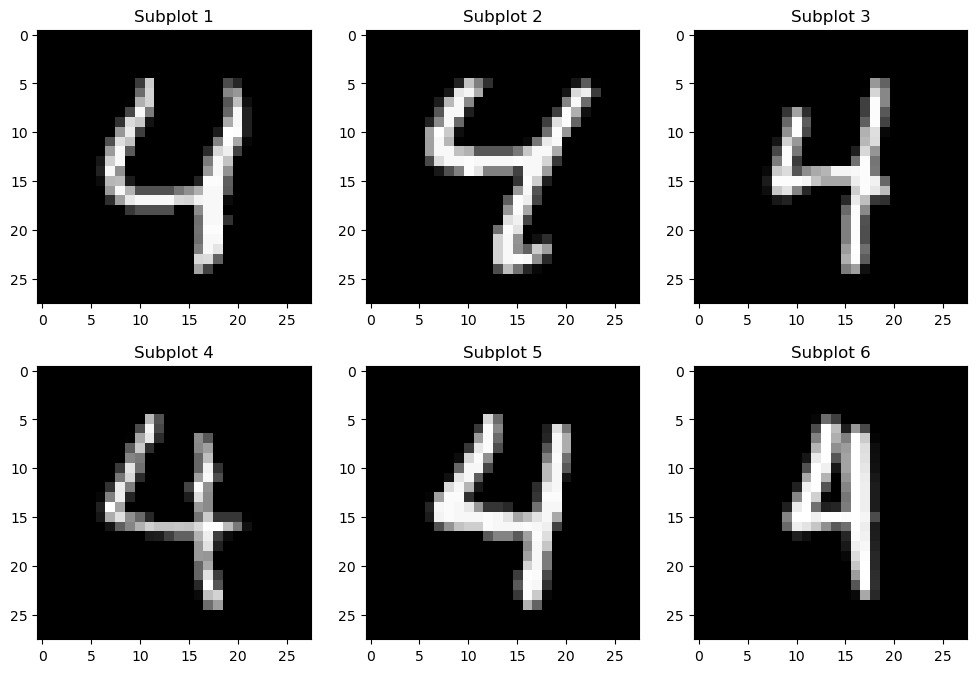

In [219]:
import matplotlib.pyplot as plt
# Generate plot with images of my digit
# Create a figure and 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axs array for easier iteration
axs_flat = axs.flatten()

# Loop through data and subplots to plot
for i, (dat, ax) in enumerate(zip(digit_imgs, axs_flat), start=1):
    ax.imshow(dat, cmap='gray_r', interpolation='None')  

plt.show()

In [ ]:
# Create a figure and 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot something in each subplot
axs[0, 0].plot([1, 2, 3], [4, 5, 6])
axs[0, 0].set_title('Subplot 1')

axs[0, 1].scatter([1, 2, 3], [4, 5, 6], color='red')
axs[0, 1].set_title('Subplot 2')

axs[0, 2].hist([1, 1, 2, 2, 2, 3], bins=3, color='green', alpha=0.7)
axs[0, 2].set_title('Subplot 3')

axs[1, 0].bar(['A', 'B', 'C'], [3, 7, 2], color='blue')
axs[1, 0].set_title('Subplot 4')

axs[1, 1].imshow([[1, 2], [3, 4]], cmap='viridis')
axs[1, 1].set_title('Subplot 5')

axs[1, 2].pie([0.2, 0.3, 0.5], labels=['A', 'B', 'C'], autopct='%1.1f%%', colors=['orange', 'purple', 'pink'])
axs[1, 2].set_title('Subplot 6')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()